See developer site:

https://dev.socrata.com/foundry/data.cityofnewyork.us/jtpv-nuuc

NYC Open Data site on this survey:

https://data.cityofnewyork.us/Education/2019-20-School-Quality-Guide-Elementary-Middle-Sch/jtpv-nuuc

In [1]:
#load libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
import nbformat
print(nbformat.__version__)

5.1.3


<ipython-input-1-ca8d8a695734>:8: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-ca8d8a695734>:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("jtpv-nuuc", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [3]:
results_df.shape

(1311, 146)

In [4]:
results_df.head()

,dbn,school_name,school_type,enrollment,survey_pp_ri,survey_pp_ct,survey_pp_se,survey_pp_es,survey_pp_sf,survey_pp_tr,...,n_prof_2plus_watn3_mthlevel1,val_prof_2plus_watn3_mthlevel1,n_prof_pct_watn3_elalevel2,val_prof_pct_watn3_elalevel2,n_prof_pct_watn3_elalevel34,val_prof_pct_watn3_elalevel34,n_prof_pct_watn3_mthlevel2,val_prof_pct_watn3_mthlevel2,n_prof_pct_watn3_mthlevel34,val_prof_pct_watn3_mthlevel34
0,01M015,P.S. 015 Roberto Clemente,Elementary,176,0.82,0.91,0.84,0.92,0.97,0.94,...,3,No Data,6,No Data,12,No Data,10,No Data,11,No Data
1,01M019,P.S. 019 Asher Levy,Elementary,220,0.87,0.91,0.94,0.9,0.96,0.91,...,3,No Data,7,No Data,18,0.778,4,No Data,21,0.667
2,01M020,P.S. 020 Anna Silver,Elementary,423,0.73,0.88,0.83,0.92,0.96,0.96,...,25,0.2,28,0.214,22,0.591,21,0.238,25,0.92
3,01M034,P.S. 034 Franklin D. Roosevelt,K-8,279,0.6,0.67,0.66,0.79,0.92,0.88,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
4,01M063,The STAR Academy - P.S.63,Elementary,203,0.72,0.87,0.83,0.94,0.97,0.94,...,2,No Data,6,No Data,14,No Data,8,No Data,10,No Data


In [5]:
results_df.describe()

,dbn,school_name,school_type,enrollment,survey_pp_ri,survey_pp_ct,survey_pp_se,survey_pp_es,survey_pp_sf,survey_pp_tr,...,n_prof_2plus_watn3_mthlevel1,val_prof_2plus_watn3_mthlevel1,n_prof_pct_watn3_elalevel2,val_prof_pct_watn3_elalevel2,n_prof_pct_watn3_elalevel34,val_prof_pct_watn3_elalevel34,n_prof_pct_watn3_mthlevel2,val_prof_pct_watn3_mthlevel2,n_prof_pct_watn3_mthlevel34,val_prof_pct_watn3_mthlevel34
count,1311,1311,1311,1311,1311,1311,1311,1311,1311,1311,...,1311,1311,1311,1311,1311,1311,1311,1311,1311,1311
unique,1311,1308,3,752,56,53,59,58,28,41,...,62,138,78,167,127,286,62,179,133,305
top,01M015,P.S. 360,Elementary,247,No Data,No Data,No Data,0.95,0.96,0.92,...,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data
freq,1,2,693,7,164,163,164,68,197,90,...,687,1013,664,853,659,750,664,916,658,767


In [6]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Columns: 146 entries, dbn to val_prof_pct_watn3_mthlevel34
dtypes: object(146)
memory usage: 1.5+ MB


Helper functions

In [7]:
def catvardistribution(data,var,x,y,rot):
    print(data[var].value_counts(dropna=False))
    fig, ax = plt.subplots(figsize=(x,y)) # Set figure size
    sns.set(style="darkgrid")
    ax = sns.countplot(x=data[var], data=data, palette='Reds')
    plt.xticks(rotation=rot)
    plt.show()
    
def boxplot(data,var):
    print(data[var].describe())
    sns.set(style="whitegrid")
    ax = sns.boxplot(x=data[var])
    plt.show()

### Feature engineering

Create district and borough variables

In [8]:
results_df['district'] = results_df['dbn'].str[0:2]
results_df['borough'] = results_df['dbn'].str[2:3]

In [9]:
# inspect new variables
print(f"Count of school districts: {len(np.unique(results_df['district']))}")
print(f"Count of school districts: {len(np.unique(results_df['borough']))}")

Count of school districts: 33
Count of school districts: 5


84    198
31     61
10     59
02     53
09     51
27     49
11     45
28     40
24     39
20     39
29     38
06     38
30     38
19     37
15     37
08     36
25     35
17     34
12     34
22     32
03     32
21     30
13     28
14     27
07     27
26     26
23     23
04     23
05     22
01     21
18     20
32     20
16     19
Name: district, dtype: int64


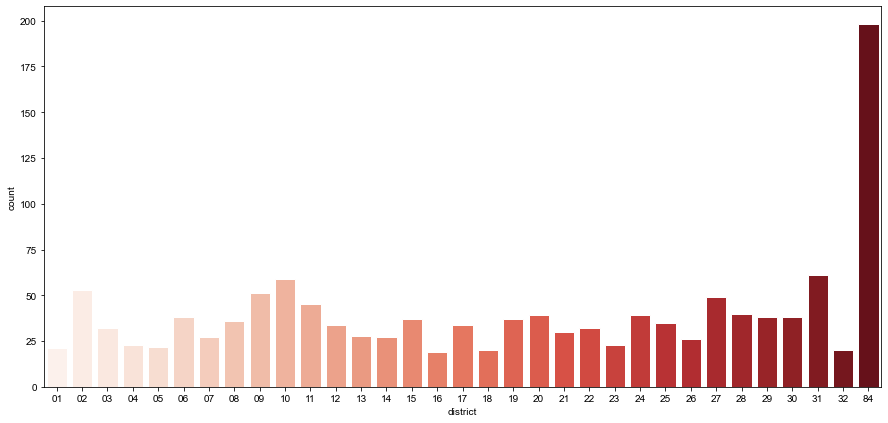

In [10]:
catvardistribution(data=results_df,var='district',x=15,y=7,rot=0)

K    421
X    309
Q    284
M    233
R     64
Name: borough, dtype: int64


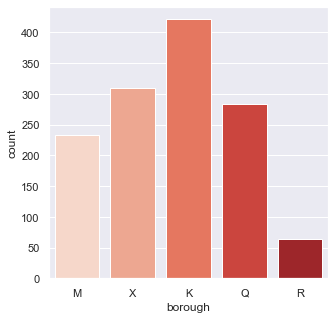

In [11]:
catvardistribution(data=results_df,var='borough',x=5,y=5,rot=0)

Inspect particular schools of interest

In [12]:
select_dbn = ['30Q398','30Q069','30Q212','30Q152','30Q222','30Q228','26Q159','28Q101']
select_df = results_df[results_df['dbn'].isin(select_dbn)]
select_df

,dbn,school_name,school_type,enrollment,survey_pp_ri,survey_pp_ct,survey_pp_se,survey_pp_es,survey_pp_sf,survey_pp_tr,...,n_prof_pct_watn3_elalevel2,val_prof_pct_watn3_elalevel2,n_prof_pct_watn3_elalevel34,val_prof_pct_watn3_elalevel34,n_prof_pct_watn3_mthlevel2,val_prof_pct_watn3_mthlevel2,n_prof_pct_watn3_mthlevel34,val_prof_pct_watn3_mthlevel34,district,borough
853,26Q159,P.S. 159,Elementary,616,0.84,0.94,0.93,0.94,0.95,0.92,...,13,No Data,89,0.798,14,No Data,87,0.885,26,Q
927,28Q101,P.S. 101 School in the Gardens,Elementary,662,0.81,0.84,0.88,0.87,0.97,0.88,...,8,No Data,62,0.758,9,No Data,60,0.95,28,Q
998,30Q069,P.S. 069 Jackson Heights,Elementary,909,0.83,0.94,0.89,0.91,0.96,0.96,...,42,0.167,91,0.769,40,0.45,88,0.898,30,Q
1016,30Q152,P.S. 152 Gwendoline N. Alleyne School,Elementary,869,0.77,0.83,0.86,0.84,0.95,0.9,...,41,0.317,97,0.722,37,0.351,96,0.906,30,Q
1020,30Q212,P.S. 212,Elementary,721,0.76,0.94,0.84,0.86,0.96,0.92,...,25,0.2,68,0.618,22,0.273,66,0.788,30,Q


In [13]:
district30elementary = results_df[(results_df['district']=='30') & (results_df['school_type']=='Elementary')]

In [26]:
district30elementary[['qr_1_1', 'qr_1_2', 'qr_2_2', 'qr_3_4', 'qr_4_2']]

,qr_1_1,qr_1_2,qr_2_2,qr_3_4,qr_4_2
994,Well Developed,Proficient,Well Developed,Well Developed,Well Developed
996,Proficient,Proficient,Proficient,Well Developed,Well Developed
997,Proficient,Proficient,Developing,Proficient,Proficient
998,Proficient,Proficient,Proficient,Well Developed,Proficient
999,Well Developed,Well Developed,Proficient,Well Developed,Proficient
1000,Developing,Developing,Developing,Well Developed,Proficient
1002,Proficient,Well Developed,Well Developed,Proficient,Proficient
1003,Proficient,Proficient,Proficient,Well Developed,Proficient
1004,Proficient,Developing,Proficient,Proficient,Proficient
1006,Proficient,Proficient,Proficient,Proficient,Developing


/Users/daniel.alvarez/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/daniel.alvarez/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


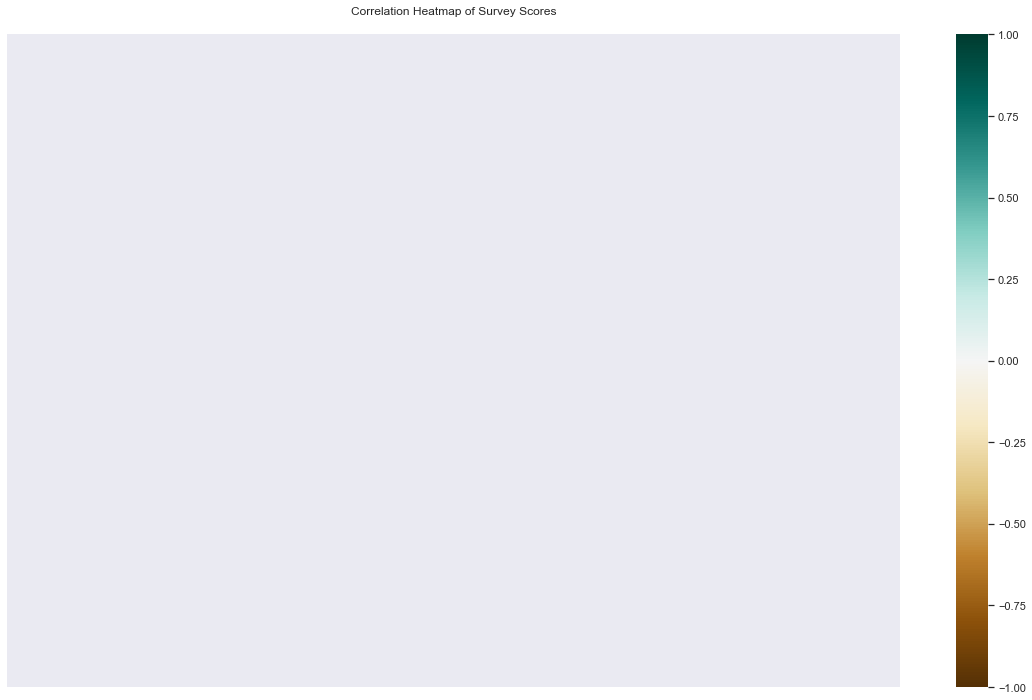

In [14]:
# correlation matrix for survey scores

def correlationMatrix(dataframe):
    corr = dataframe.iloc[:,4:].corr()
    # create a triangular matrix
#     mask = np.triu(np.ones_like(dataframe.iloc[:,4:].corr(), dtype=np.bool))
    
    # plot the heatmap
    plt.figure(figsize=(20,12))
    heatmap = sns.heatmap(corr,
                         xticklabels=corr.columns,
                         yticklabels=corr.columns,
#                          mask=mask,
                         vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap of Survey Scores', fontdict={'fontsize':12}, pad=20);

correlationMatrix(dataframe=district30elementary)

In [29]:
fig = px.scatter(district30elementary, x="qr_1_1", y="qr_1_2", #size='enrollment',
             color="borough", hover_name="school_name")
fig.update_traces(marker_size=10)

In [33]:
# results_df['principal experience']
results_df.columns[-20:]

Index(['n_prof_pct_watn5_elalevel34', 'val_prof_pct_watn5_elalevel34',
       'n_prof_pct_watn5_mthlevel2', 'val_prof_pct_watn5_mthlevel2',
       'n_prof_pct_watn5_mthlevel34', 'val_prof_pct_watn5_mthlevel34',
       'n_prof_2plus_watn3_elalevel1', 'val_prof_2plus_watn3_elalevel1',
       'n_prof_2plus_watn3_mthlevel1', 'val_prof_2plus_watn3_mthlevel1',
       'n_prof_pct_watn3_elalevel2', 'val_prof_pct_watn3_elalevel2',
       'n_prof_pct_watn3_elalevel34', 'val_prof_pct_watn3_elalevel34',
       'n_prof_pct_watn3_mthlevel2', 'val_prof_pct_watn3_mthlevel2',
       'n_prof_pct_watn3_mthlevel34', 'val_prof_pct_watn3_mthlevel34',
       'district', 'borough'],
      dtype='object')

In [34]:
fig = px.scatter(district30elementary, x="val_prof_pct_watn3_mthlevel2", y="val_prof_pct_watn3_mthlevel34", #size='enrollment',
             color="borough", hover_name="school_name")
fig.update_traces(marker_size=10)

In [20]:
app = dash.Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

fig = px.scatter(results_df, x="qr_1_1", y="qr_1_2", size='enrollment',
             color="borough", hover_name="school_name")

fig.update_traces(marker_size=10)

fig.show()


app.layout = html.Div(children=[
    dcc.Graph(
        id='interesting and challening verses effectiveness of instruction',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

TypeError: unsupported operand type(s) for /: 'str' and 'int'